## **LSTM for TimeSeries Forecasting**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [21]:
df=pd.read_csv('/content/drive/MyDrive/airline_passengers.csv',index_col='Month')

In [22]:
df

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [24]:
train=df[:132]
test=df[132:]


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [26]:
n_input=12
n_features=1

In [27]:
train_generator=TimeseriesGenerator(scaled_train,
                                     scaled_train,
                                      n_input,
                                      batch_size=1)

In [28]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 12, 50)            30200     
                                                                 
 lstm_5 (LSTM)               (None, 10)                2440      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(train_generator,epochs=20)

Epoch 1/20
120/120 [==============================] - 5s 14ms/step - loss: 0.0274
Epoch 2/20
120/120 [==============================] - 2s 14ms/step - loss: 0.0130
Epoch 3/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0137
Epoch 4/20
120/120 [==============================] - 2s 14ms/step - loss: 0.0106
Epoch 5/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0098
Epoch 6/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0101
Epoch 7/20
120/120 [==============================] - 2s 14ms/step - loss: 0.0113
Epoch 8/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0083
Epoch 9/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0078
Epoch 10/20
120/120 [==============================] - 2s 15ms/step - loss: 0.0074
Epoch 11/20
120/120 [==============================] - 2s 14ms/step - loss: 0.0059
Epoch 12/20
120/120 [==============================] - 2s 14ms/step - loss: 0.0052
Epoch 13/20
1

In [31]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
    pred = model.predict(current_batch)[0]
    test_predictions.append(pred)
    current_batch = np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [32]:
test_predictions

[array([0.6109803], dtype=float32),
 array([0.63551384], dtype=float32),
 array([0.7143702], dtype=float32),
 array([0.7241414], dtype=float32),
 array([0.8086752], dtype=float32),
 array([0.94559747], dtype=float32),
 array([1.0415933], dtype=float32),
 array([0.9987711], dtype=float32),
 array([0.8169961], dtype=float32),
 array([0.69768524], dtype=float32),
 array([0.66487944], dtype=float32),
 array([0.70602703], dtype=float32)]

In [33]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[381.99602389],
       [393.15879816],
       [429.03843695],
       [433.48434561],
       [471.94722944],
       [534.24684876],
       [577.92495751],
       [558.4408375 ],
       [475.73322439],
       [421.44678497],
       [406.52014577],
       [425.24229908]])

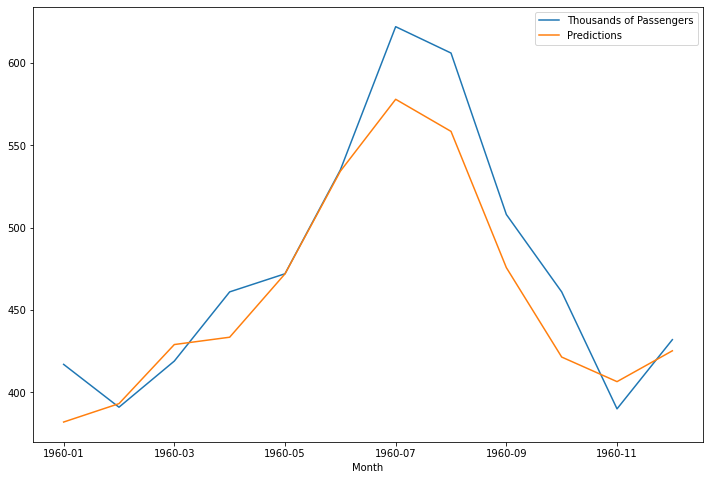

In [34]:
test['Predictions'] = actual_predictions
test.plot(figsize=(12,8));